Import Relevant Libraries

In [1]:
#Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import sys
import random
from __future__ import print_function
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn import tree

In [2]:
# Install -U scikit-learn
%pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Data Exploration

In [4]:
#Read Data of our generated csv file
data = pd.read_csv('/content/drive/MyDrive/GambleAware/players.csv')

In [5]:
#Check head
data.head()

,Time,Win/Loss Ratio,Number of Deposits,label
0,1,1.756696,1,0
1,0,1.612995,1,0
2,1,2.526176,2,0
3,2,2.045361,2,0
4,0,2.824066,0,0


In [6]:
data.tail()

,Time,Win/Loss Ratio,Number of Deposits,label
24467,16,0.064482,35,5
24468,6,0.063409,32,5
24469,24,0.087549,26,5
24470,15,0.080995,38,5
24471,6,0.037278,40,5


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24472 entries, 0 to 24471
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Time                24472 non-null  int64  
 1   Win/Loss Ratio      24472 non-null  float64
 2   Number of Deposits  24472 non-null  int64  
 3   label               24472 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 764.9 KB


In [8]:
#Check number of players in each gamber category in our dataset
data['label'].value_counts()

4    4705
5    4341
3    4214
2    4169
0    3915
1    3128
Name: label, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

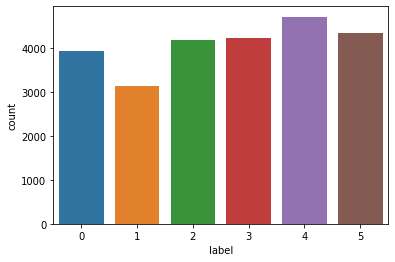

In [9]:
sns.countplot(data['label'])

Build model

In [10]:
#Separate dependent and independent variables
X = data.drop('label', axis = 1)
Y = data['label']

In [11]:
#Split data into training data and testing data

#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [12]:
#Check shape of training and testing data
'Train Shape', X_train.shape, y_train.shape

('Train Shape', (19577, 3), (19577,))

In [13]:
'Test Shape', X_test.shape, y_test.shape

('Test Shape', (4895, 3), (4895,))

Building our Decision Tree

In [14]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
#Prediction for training and testing set
tr_predict = model.predict(X_train)
ts_predict = model.predict(X_test)

In [18]:
#Check accuracy for both training and testing data
'Training Accuracy: ', accuracy_score(y_train,tr_predict)

('Training Accuracy: ', 1.0)

In [17]:
'Testing Accuracy: ', accuracy_score(y_test,ts_predict)

('Testing Accuracy: ', 0.946067415730337)

In [23]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,20), dpi=1000)
plot_tree(model, filled = True, feature_names = X.columns)
plt.savefig('Gamblers-Decision-Tree')
plt.show()

In [ ]:
# show importance of features in building tree
df_importance = pd.DataFrame({'Features' : X.columns, 'Importance': model.feature_importances_})
df_importance
#The data shows that the most important feature that is considered is
#the win/loss rate, then time spent gambling
#which makes sense, right?

,Features,Importance
0,Time,0.342435
1,Win/Loss Ratio,0.510285
2,Number of Deposits,0.147279


In [ ]:
#This block of code saves the model as a pickle file and downloads it
import pickle
with open('gambler_classifier.pickle', 'wb') as f:
  pickle.dump(model,f)